# Fraud Detection Problem 

In [1]:
# Importing some nexessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset.

original =pd.read_csv('Fraud.csv')
data = original.copy()

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
# Checking for missing values within data.

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Counting transactions that are flagged as fraudulent or non-fraudulent.

data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [7]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

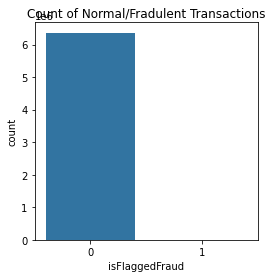

In [8]:
# Analyzing Data.

fig, ax=plt.subplots(figsize=(4,4))
ax=sns.countplot(x='isFlaggedFraud',data=data)
plt.title('Count of Normal/Fradulent Transactions')
plt.show()

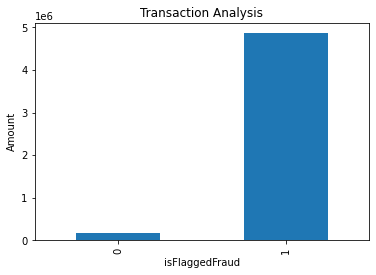

In [9]:

data.groupby('isFlaggedFraud')['amount'].mean().plot.bar()
plt.ylabel('Amount')
plt.title('Transaction Analysis')
plt.show()

It can be inferred from the above analysis that fraudulent transactions mostly involved huge amounts compared to normal transactions.

In [10]:
res=len(data[data['isFlaggedFraud']==1])/len(data)
print('Percentage of Fraudulent transactions Flagged : ','{}%'.format((res)))

Percentage of Fraudulent transactions Flagged :  2.51468734577894e-06%



 -It can be understood that the occurence of fraudulent transactions within the given dataset are very rare. Hence   the classification of data is highly imbalanced between Fraudulent and Normal transactions.

In [11]:
# Problem statement is about detecting Fradulent Transactions.

flagged_fraud = data[data['isFlaggedFraud']==1]
print('Transactions flagged as fraud in the dataset are : ','{}'.format(len(flagged_fraud)))

Transactions flagged as fraud in the dataset are :  16


In [12]:
# Sampling data as considering the entire dataset of 6362620 records can be computationally expensive. Here we are taking a sample size of 30%.

samp=data.sample(frac=0.2,random_state=1)

In [13]:
samp.shape

(1272524, 11)

In [14]:
type(samp)

pandas.core.frame.DataFrame

In [15]:
# Within our sample, we are determining count of fraudulent/Nonn-fradulent transactions.

t1=samp[samp['isFlaggedFraud']==1]
t2=samp[samp['isFlaggedFraud']==0]
print('Fradulent Transactions within the sample :','{}'.format(len(t1)))
print('Normal Transactions within the sample :','{}'.format(len(t2)))

Fradulent Transactions within the sample : 1
Normal Transactions within the sample : 1272523


In [16]:
# Segregating our Independent and Dependent features. Here X will hold all the Independent features and Y the Dependent/Target feature.

cols=samp.columns.tolist()
cols1=[col for col in cols if col not in ['isFlaggedFraud']]
target="isFlaggedFraud"
X=samp[cols1]
Y=samp[target]


In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
print(X.shape, Y.shape)

(1272524, 10) (1272524,)


In [19]:
X.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6322570,688,CASH_IN,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0
3621196,274,PAYMENT,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0
1226256,133,PAYMENT,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0


In [20]:
rs=np.random.RandomState(42)
outlier=rs.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))

In [21]:
# To determine all the numerical features of the sample.

num_x= [feature for feature in X.columns if X[feature].dtype!='O']
num_x

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

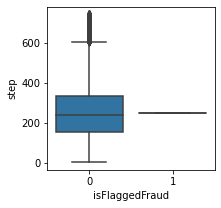

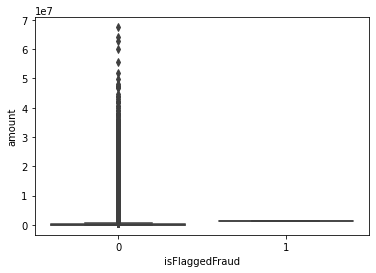

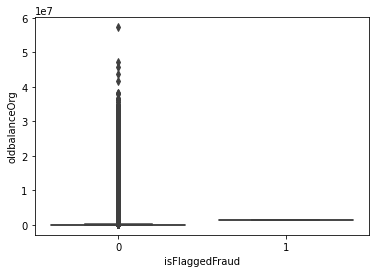

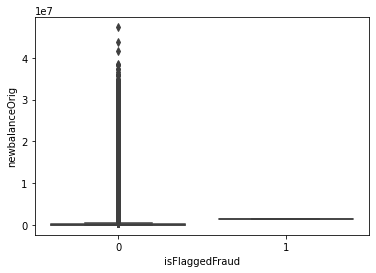

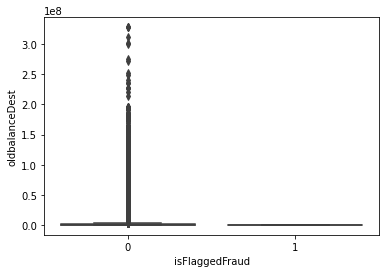

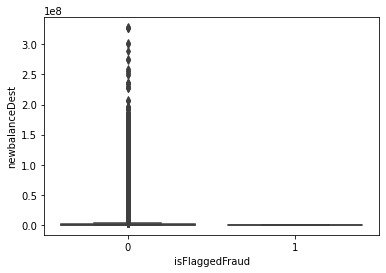

In [22]:
# Check for Outliers.

fig, ax=plt.subplots(figsize=(3,3))
for feature in num_x:
    if feature not in ['isFraud']:
        sns.boxplot(y=feature,x='isFlaggedFraud',data=samp)
        plt.ylabel(feature)
        plt.show()

The boxplot representation above indicates the presence of outliers in the sample.

In [23]:
# Dropping features nameorig and nameDest from the sample.

X.drop(['nameOrig','nameDest'],axis=1,inplace=True)

/home/rajsreed/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
X.groupby('type')['isFraud'].count()

type
CASH_IN     280322
CASH_OUT    447229
DEBIT         8320
PAYMENT     430247
TRANSFER    106406
Name: isFraud, dtype: int64

In [25]:
# Checking for different categories for the 'type' variable.

data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
# Handling the categorical variable:type using get_dummies function.

typ=pd.get_dummies(samp['type'],drop_first=True)

In [27]:
X=pd.concat([X,typ],axis=1)
X.drop(['type'],axis=1,inplace=True)

In [28]:
X.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2915604,229,127281.18,347953.00,475234.18,85798.26,0.00,0,0,0,0,0
6168411,552,229381.34,10223051.44,10452432.78,15525982.92,15296601.58,0,0,0,0,0
970319,44,353801.58,0.00,0.00,601603.76,955405.34,0,1,0,0,0
1329756,137,37659.34,360829.27,323169.93,0.00,0.00,0,0,0,1,0
6209813,588,609.64,0.00,0.00,0.00,0.00,0,0,0,1,0


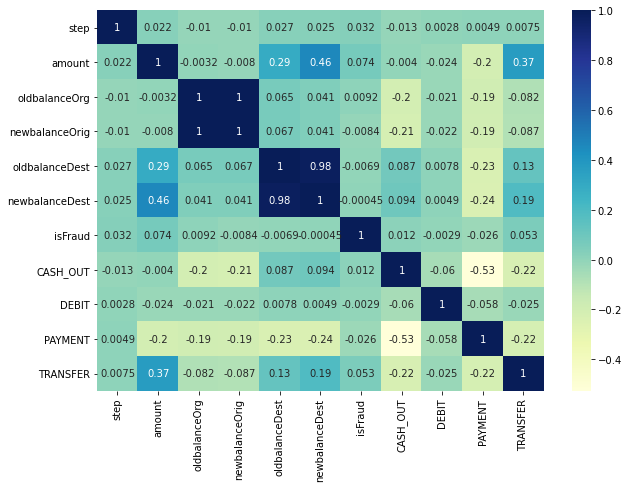

In [29]:
# Check for Correlation between various features.

fig, ax=plt.subplots(figsize=(10,7))
ax = sns.heatmap(X.corr(),annot=True,cmap="YlGnBu")
#plt.figure(figsize=(50.0,60.0))
plt.show()

From the correlation matrix above it can be found that, Parameters :oldbalanceDest and newbalanceDest contribute almost the same level of information as they are both highly correlated. So any one can be removed.

In [30]:
X.drop(['oldbalanceDest'],axis=1,inplace=True)

The data is now prepared and ready to be trained.

### Considering the dataset being imbalanced and the presence of outliers, the machine learning models that have been chosen for anomaly detection for our current analysis are as follows:
  1. Isolation Forest
  2. Local Outlier Factor

Both models use an Unsupervised Learning approach for anomaly detection. 

## Isolation Forest 

In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
# random=np.random.RandomState(42)

In [33]:
# Determining the percentage of outliers within our sample.

outlier_fraction=(len(t1)/float(len(t2)))
outlier_fraction

7.858404131005884e-07

In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
# Creating an instance of Isolation Forest algorithm.

s=len(X)
model=IsolationForest(n_estimators=100,max_samples=s,contamination=outlier_fraction,random_state=rs)
model

IsolationForest(contamination=7.858404131005884e-07, max_samples=1272524,
                random_state=RandomState(MT19937) at 0x7FE24E7DC040)

In [36]:
# Fitting the model on X.

model.fit(X)

IsolationForest(contamination=7.858404131005884e-07, max_samples=1272524,
                random_state=RandomState(MT19937) at 0x7FE24E7DC040)

In [37]:
# Model Prediction for values in X.

score=model.decision_function(X)
y_pred=model.predict(X)

In [38]:
# Re-assigning the model predicted anomaly scores to 0 and 1 respectively as per our target variable.

y_pred[y_pred == 1] = 0  # For Normal Transaction Prediction
y_pred[y_pred == -1] = 1 # For Fraudulent Transaction prediction

In [39]:
# Metrics to compute accuracy of the model.

from sklearn.metrics import classification_report,accuracy_score
print('Isolation Forest')
err_num= (y_pred != Y).sum()
print('\nNo. of Errors : ','{}'.format(err_num))
print('Accuracy Score : ','{}'.format(accuracy_score(Y,y_pred)))
print('Classification Report: ','{}'.format(classification_report(Y,y_pred)))

Isolation Forest

No. of Errors :  2
Accuracy Score :  0.9999984283204089
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272523
           1       0.00      0.00      0.00         1

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



In [40]:
# import shap
# shap_val=shap.TreeExplainer(model).shap_values(X)
# shap.summary_plot(shap_values,X,plot_type="bar")

In [41]:
# Hyperparameter tuning for Isolation forest

model1=IsolationForest(random_state=47)

In [71]:
params = { 'n_estimators': list(range(100,200,50)),
           'max_samples': list(range(100000,300000,50000)),
          'contamination': [0.1, 0.2]
}

In [72]:
from sklearn.metrics import make_scorer,f1_score
f1scr=make_scorer(f1_score,average='micro')

In [75]:
from sklearn.model_selection import GridSearchCV 
grid_model1=GridSearchCV(estimator=model1,param_grid=params,cv=2,return_train_score=True,scoring=f1scr,refit=True,n_jobs=-1)

In [76]:
grid_model1.fit(X,Y)

GridSearchCV(cv=2, estimator=IsolationForest(random_state=47), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2],
                         'max_samples': [100000, 150000, 200000, 250000],
                         'n_estimators': [100, 150]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro))

In [77]:
grid_model1.best_params_

{'contamination': 0.1, 'max_samples': 100000, 'n_estimators': 100}

In [79]:
tuned_model=IsolationForest(contamination=0.1,max_samples=100000, n_estimators=100)

In [80]:
tuned_model.fit(X)

IsolationForest(contamination=0.1, max_samples=100000)

In [81]:
y_newpred=tuned_model.predict(X)

In [82]:
y_newpred[y_newpred == 1] = 0  
y_newpred[y_newpred == -1] = 1

In [83]:
# Metrics to compute accuracy of the model.

from sklearn.metrics import classification_report,accuracy_score
print('Isolation Forest after Hyperparameter Tuning')
new_err_num= (y_newpred != Y).sum()
print('\nNo. of Errors : ','{}'.format(new_err_num))
print('Accuracy Score : ','{}'.format(accuracy_score(Y,y_newpred)))
print('Classification Report: ','{}'.format(classification_report(Y,y_newpred)))

Isolation Forest after Hyperparameter Tuning

No. of Errors :  127252
Accuracy Score :  0.9000003143359182
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.90      0.95   1272523
           1       0.00      1.00      0.00         1

    accuracy                           0.90   1272524
   macro avg       0.50      0.95      0.47   1272524
weighted avg       1.00      0.90      0.95   1272524



After performing Hyperparameter Tuning of Isolation Forest Model, it can be noted that:


1. The recall rate improved for predicting fraudulent transactions with the model performance accuracy rate at    90%.
2. However, the number of errors predicted increased.

### Local Outlier Factor

In [46]:
from sklearn.neighbors import LocalOutlierFactor

In [47]:
lof=LocalOutlierFactor(n_neighbors=10, algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction)

In [48]:
y_lofpred=lof.fit_predict(X)

In [49]:
err_num= (y_lofpred != Y).sum()
y_lofpred[y_lofpred == 1] = 0
y_lofpred[y_lofpred == -1] = 1
print('No. of Errors : ','{}'.format(err_num))
print('Accuracy Score : ','{}'.format(accuracy_score(Y,y_lofpred)))
print('Classification Report: ','{}'.format(classification_report(Y,y_lofpred)))

No. of Errors :  1272523
Accuracy Score :  0.9999984283204089
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272523
           1       0.00      0.00      0.00         1

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



### Analysis findings:-


1. The Isolation Factor model performed slightly better after performing hyperparameter tuning and gave fewer number of errors compared to Local Outlier Factor.

2. Both the models gave us almost the same accuracy score of  nearly 100% without hyperparameter tuning. The precision/recall rate was also similar for both of the models.

3. However, with hyperparameter tuning of Isolation Forest model,better results could be achieved. 

 